In [5]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/299.9 kB 435.7 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 409.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 508.4 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 807.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/299.9 kB 807.1 kB/s eta 0:00:01
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
df_fake = pd.read_csv("../data/raw/Fake.csv")
df_true = pd.read_csv("../data/raw/True.csv")

In [10]:

df_fake["label"] = 0
df_true["label"] = 1

In [11]:
df = pd.concat([df_fake, df_true], axis=0).reset_index(drop=True)

In [12]:
df["full_text"] = df["title"].fillna("") + " " + df["text"].fillna("")

In [14]:
print(df.shape)
print(df.head())
print(df["label"].value_counts())

(44898, 6)
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label                                          full_text  
0  December 31, 2017      0   Donald Trump Sends Out Embarrassing New Year’...  
1  December 31, 2017      0   Drunk Bragging Trump Staffer Started Russian ...  
2  December 30, 2017    

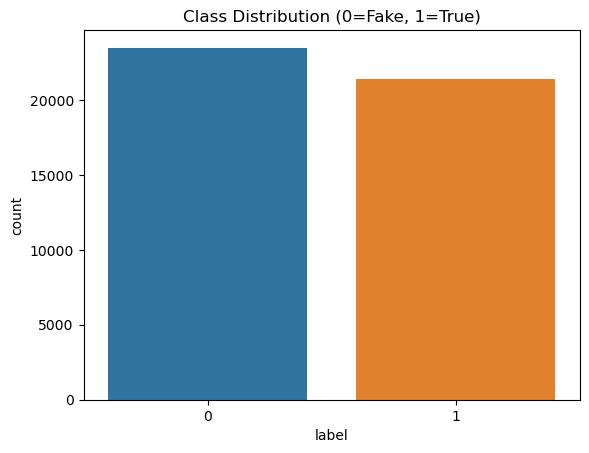

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

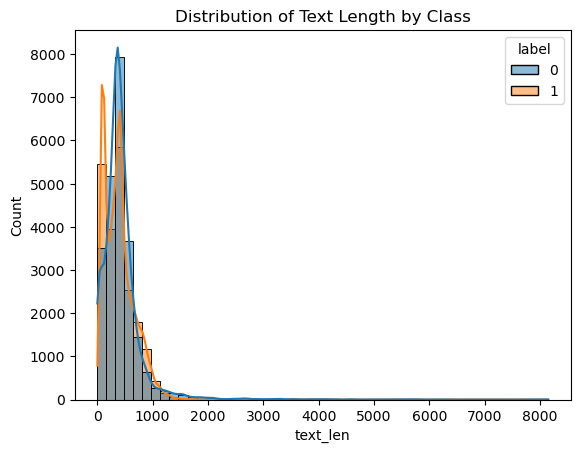

In [16]:
sns.countplot(x=df["label"])
plt.title("Class Distribution (0=Fake, 1=True)")
plt.show()

# طول النصوص
df["text_len"] = df["full_text"].apply(lambda x: len(x.split()))
sns.histplot(data=df, x="text_len", hue="label", bins=50, kde=True)
plt.title("Distribution of Text Length by Class")
plt.show()


In [18]:
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)   # شيل الروابط
    text = text.translate(str.maketrans("", "", string.punctuation))  # شيل علامات الترقيم
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df["clean_text"] = df["full_text"].astype(str).apply(clean_text)

print(df[["full_text", "clean_text"]].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                           full_text  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                          clean_text  
0  donald trump sends embarrassing new year’s eve...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes internet joke thr...  
3  trump obsessed even obama’s name coded website...  
4  pope francis called donald trump christmas spe...  


In [ ]:
df.to_csv("../data/processed/news_clean.csv", index=False)
